In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from os.path import join

In [29]:
AGENT_CODE_DIR = r"/home/fieeesch/mle/Final_project/Aenormendeas-Bomber-Man/agent_code"
AGENT_DATA_DIR = join(
    AGENT_CODE_DIR, 
    "aenormendeas_agent", 
    "training_metrics"
)
RESULTS_DIR = join(AGENT_CODE_DIR, "..", "results")
SCORE_FILE = join(AGENT_DATA_DIR, "classic_versus_collector_small_scores2.pkl")
WINS_FILE = join(AGENT_DATA_DIR, "classic_versus_collector_small_wins2.pkl")
OTHERS_FILE = join(AGENT_DATA_DIR, "coin-heaven_others.pkl")

SCORE_OUTPUT_FILE = join(RESULTS_DIR, "coin-heaven-scores.png")
NUMBER_OF_GAMES = 1000         # Number of games in each chunk for averaging

def load_scores(score_file):
    with open(score_file, 'rb') as f:
        scores = pickle.load(f)
    return scores

def load_score_files(score_files):
    if isinstance(score_files, str):
        return load_scores(score_files)
    else:
        return np.concatenate(
            [load_scores(file) for file in score_files])


def chunked_averages(data, chunk_size):
    # Break the data into chunks of `chunk_size`
    num_chunks = len(data) // chunk_size
    avg_scores = [np.mean(data[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
    return avg_scores

def plot_averages(avg_scores, chunk_size, output_image):
    plt.figure(figsize=(10, 6))
    
    # Plot the chunked averages
    plt.plot(avg_scores, label='Training Performance Over Time', color='#1f77b4', linewidth=2.5)

    # Handle the x ticks
    x_ticks, labels = plt.xticks()[0][1:-1], plt.xticks()[1][1:-1]
    x_labels = [str(int(float(label.get_text().translate({0x2c: '.', 0xa0: None, 0x2212: '-'}))) * chunk_size)
                for label in labels]
    plt.xticks(x_ticks, x_labels, rotation=45, fontsize=10)

    # Add grid with a custom style
    plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

    # Labeling the graph
    plt.title(f'Average Training Score per {chunk_size} Games', fontsize=14, fontweight='bold')
    plt.xlabel(f'Number of Games', fontsize=12, fontweight='bold')
    plt.ylabel(f'Average Score', fontsize=12, fontweight='bold')
    plt.legend(loc='lower right')
    
    # Save the plot to file
    plt.tight_layout()
    plt.savefig(output_image, dpi=300)
    plt.show()

def analyze_scores(score_files, num_games, output_image):
    # Load the scores
    scores = load_score_files(score_files)
    
    # Calculate chunked averages
    avg_scores = chunked_averages(scores, num_games)
    
    # Plot and save the graph
    plot_averages(avg_scores, num_games, output_image)

ValueError: invalid literal for int() with base 10: '0.0'

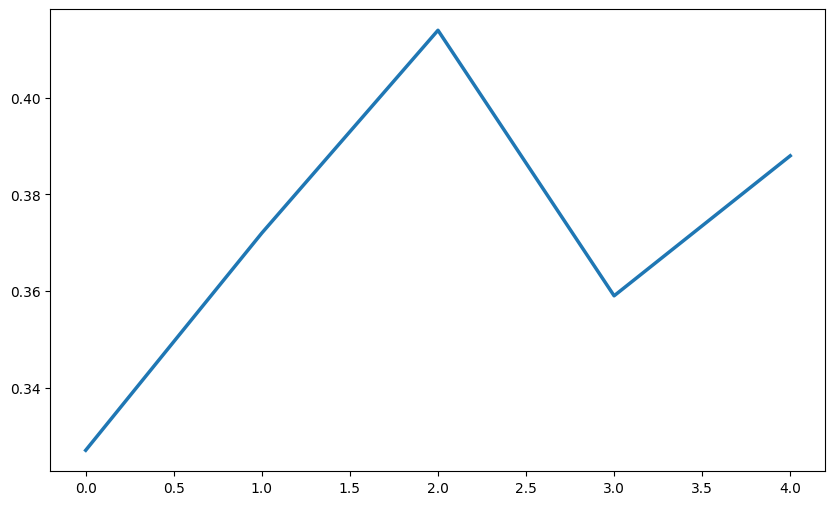

In [30]:
# Run analysis on coin-heaven training scores
analyze_scores(SCORE_FILE, NUMBER_OF_GAMES, SCORE_OUTPUT_FILE)

In [3]:
print(float("-20"))

-20.0
